<a href="https://colab.research.google.com/github/sussahoo/Keras-ML/blob/master/NLP-WordGeneration-LSTM-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [0]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # we want to generate OOV kind of token, total_words is used in last dense as well as for one hot encoding of labels

print(tokenizer.word_index)
print(total_words)


{'replied': 246, 'all': 5, 'forget': 87, 'just': 48, 'being': 254, 'able': 227, 'catchers': 146, 'soon': 53, 'cheeks': 208, 'through': 186, 'go': 200, 'colleen': 230, 'chaneys': 237, 'ground': 81, 'tore': 233, 'jig': 162, 'some': 212, 'nolans': 129, 'cried': 191, 'reel': 161, 'father': 74, 'young': 182, 'acres': 80, 'to': 13, 'under': 234, 'weeks': 30, 'might': 104, 'hall': 141, 'gave': 82, 'town': 66, 'them': 57, 'his': 16, 'around': 177, 'chanters': 259, 'big': 243, 'swore': 198, 'entangled': 261, 'they': 19, 'new': 37, 'ogradys': 131, 'him': 33, 'minute': 106, 'groups': 179, 'gray': 144, 'banished': 158, 'potatoes': 125, 'ned': 223, 'mcgilligan': 120, 'sweetheart': 222, 'fainted': 64, 'kerrigan': 207, 'steps': 38, 'she': 14, 'small': 217, 'athy': 67, 'creature': 190, 'round': 25, 'stretched': 231, 'squeezed': 256, 'declared': 214, 'learn': 174, 'old': 55, 'ten': 79, 'doing': 150, 'tea': 128, 'bacon': 127, 'sure': 101, 'further': 202, 'odaly': 111, 'drop': 218, 'out': 32, 'row': 206,

In [0]:

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [0]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [0]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [0]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(tokenizer.word_index)

{'replied': 246, 'all': 5, 'forget': 87, 'just': 48, 'being': 254, 'able': 227, 'catchers': 146, 'soon': 53, 'cheeks': 208, 'through': 186, 'go': 200, 'colleen': 230, 'chaneys': 237, 'ground': 81, 'tore': 233, 'jig': 162, 'some': 212, 'nolans': 129, 'cried': 191, 'reel': 161, 'father': 74, 'young': 182, 'acres': 80, 'to': 13, 'under': 234, 'weeks': 30, 'might': 104, 'hall': 141, 'gave': 82, 'town': 66, 'them': 57, 'his': 16, 'around': 177, 'chanters': 259, 'big': 243, 'swore': 198, 'entangled': 261, 'they': 19, 'new': 37, 'ogradys': 131, 'him': 33, 'minute': 106, 'groups': 179, 'gray': 144, 'banished': 158, 'potatoes': 125, 'ned': 223, 'mcgilligan': 120, 'sweetheart': 222, 'fainted': 64, 'kerrigan': 207, 'steps': 38, 'she': 14, 'small': 217, 'athy': 67, 'creature': 190, 'round': 25, 'stretched': 231, 'squeezed': 256, 'declared': 214, 'learn': 174, 'old': 55, 'ten': 79, 'doing': 150, 'tea': 128, 'bacon': 127, 'sure': 101, 'further': 202, 'odaly': 111, 'drop': 218, 'out': 32, 'row': 206,

In [0]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Train on 453 samples
Epoch 1/500
453/453 [==============================] - 8s 18ms/sample - loss: 5.5687 - accuracy: 0.0088
Epoch 2/500
453/453 [==============================] - 0s 328us/sample - loss: 5.5425 - accuracy: 0.0243
Epoch 3/500
453/453 [==============================] - 0s 302us/sample - loss: 5.4735 - accuracy: 0.0265
Epoch 4/500
453/453 [==============================] - 0s 298us/sample - loss: 5.2909 - accuracy: 0.0353
Epoch 5/500
453/453 [==============================] - 0s 297us/sample - loss: 5.1271 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 0s 283us/sample - loss: 5.0671 - accuracy: 0.0508
Epoch 7/500
453/453 [==============================] - 0s 293us/sample - loss: 5.0273 - accuracy: 0.0464
Epoch 8/500
453/453 [==============================] - 0s 264us/sample - loss: 4.9942 - accuracy: 0.0530
Epoch 9/500
453/453 [==============================] - 0s 318us/sample - loss: 4.9625 - accuracy: 0.0574
Epoch 10/500
453/453 [=============

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

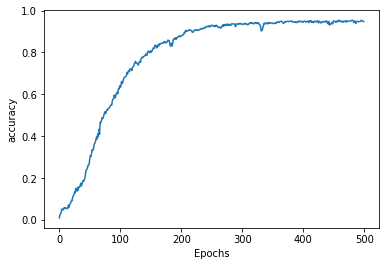

In [0]:
plot_graphs(history, 'accuracy')


**Single prediction**

In [0]:
seed_text = "Laurence went to dublin"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') # max_sequence_len-1 , because initially we had last column as label, here no label

xx = model.predict(token_list)
print(xx.shape) # [[7.54368727e-07 3.03809959e-02 8.97304993e-03 6.51388466e-02.......]]

predicted = model.predict_classes(token_list, verbose=0)
print(predicted)


for word, index in tokenizer.word_index.items():
  if index == predicted:
    output_word = word
    print(output_word)
    break

print(tokenizer.word_index['got'])

(1, 263)
[23]
got
23


In [0]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin got a through miss finnertys cask eyes me didnt forget me didnt creature a make mchugh arrived saw glisten eyes them fainted and might might would fall nonsense fall fall fall old fall eyes me didnt forget forget me didnt forget new catchers saw your saw glisten glisten eyes me creature long long out were all dublin runctions by dublin dublin lanigans ball hearty satisfaction the mad me entangled forget forget me saw didnt saw the ground fair casey the wall call taras call ask hall ask hearty me saw forget saw forget satisfaction swore saw her father fair a
